## Task: Predict weekly sales of a walmart store using linear regression

You are provided with a dataset about Walmart's sales in a CSV file.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Note:

You might find it helpful to include information about the kind of holiday week it is. This is something you'll need to add through data processing.
You can use this information about the holiday weeks.

Holiday Events:
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Tasks:
- Preprocess the data:
    - Remove any column which might not be useful
    - Add holiday type information
    - Normalize the data
- Split the data randomly into training and testing sets (80:20 split)
- Build and train a linear regression model. You can use any framerwork for this (numpy, sklearn or pytorch)
- Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Visualize model performance using graphs.

In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install gdown==4.5


clear_output()

In [ ]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 4.37MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn

In [ ]:
data_df = pd.read_csv('Walmart.csv')

In [ ]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#Preprocess the dataset

In [ ]:
data_df = data_df.drop(columns=['Date'])

In [ ]:
X = data_df.drop(columns=['Weekly_Sales']).values
y = data_df['Weekly_Sales'].values
# ".values" converts the object from dataframe to numpy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# normalizing the data on X only, never change y, always leave y the same

#Normal equation using numpy


In [ ]:
def mseloss(yhat, y):
  return np.mean((yhat - y) ** 2)

In [ ]:
train_theta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ (X_train_scaled.T @ y_train)

yhat_train = X_train @ train_theta

train_loss = mseloss(yhat_train, y_train)

In [ ]:
test_theta = np.linalg.inv(X_test_scaled.T @ X_test_scaled) @ ((X_test_scaled.T @ y_test))

yhat_test = X_test @ test_theta

test_loss = mseloss(yhat_test, y_test)

In [ ]:
print("Results using numpy only")
print("train loss is: ", train_loss)
print("test loss is: ", test_loss)

Results using numpy only
train loss is:  517205898270374.3
test loss is:  695435956140268.8


#Linear Regression using Sklearn

In [ ]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

train_loss = mean_squared_error(yhat_train, y_train)
test_loss = mean_squared_error(yhat_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("Results using sklearn")
print("train loss is: ", train_loss)
print("test loss is: ", test_loss)

Results using sklearn
train loss is:  471458818773671.3
test loss is:  467214341590856.4


#Using pytorch and neural networks for linear regression

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
class LinearRegressionNN(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionNN, self).__init__()
        self.l1 = nn.Linear(input_size, 20)
        self.l2 = nn.Linear(20, 10)
        self.l3 = nn.Linear(10, 1)

    def forward(self, x):
      x = self.l1(x)
      x = nn.functional.sigmoid(x)
      x = self.l2(x)
      x = nn.functional.sigmoid(x)
      x = self.l3(x)
      return x

In [ ]:
input_size = X_train_tensor.shape[1]
model_nn = LinearRegressionNN(input_size)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_nn.parameters(), lr=0.001)

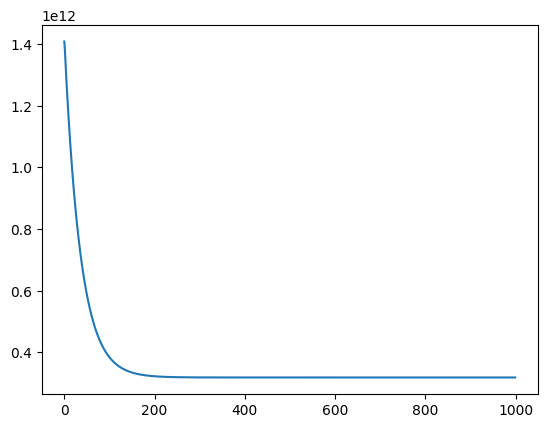

In [ ]:
num_epochs = 1000
ls = []
for epoch in range(num_epochs):
    # Forward pass
    yhat = model_nn(X_train_tensor)
    loss = loss_fn(yhat, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ls.append(loss.item())

plt.plot(ls)

with torch.no_grad():
    yhat_test = model_nn(X_test_tensor)
    loss_test = loss_fn(yhat_test, y_test_tensor.view(-1, 1))

In [ ]:
print("Results using neural networks")
print("Train loss is: ", loss.item())
print("Test loss is: ", loss_test.item())

Results using neural networks
Train loss is:  317517234176.0
Test loss is:  322251489280.0
